# Visualizations of Earnings report

In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# params
FP_EER_CLEAN = os.path.join('data','eer19.feather')
assert os.path.exists(FP_EER_CLEAN)

FP_FIG_TOP_OUT = os.path.join('plots','top_50_bar19.svg')
FP_FIG_OVRTM_OUT = os.path.join('plots','top_20_overtime19.svg')

PREFERRED_COL_NAMES = ['dept','name','title','regular','overtime','detail','longevity','incentive','severance','other','total']

matplotlib.style.use('seaborn')

In [74]:
eer = pd.read_feather(FP_EER_CLEAN)
og_cols = eer.columns
eer.columns = PREFERRED_COL_NAMES

In [75]:
eer.sort_values('total',ascending=False).head()

,dept,name,title,regular,overtime,detail,longevity,incentive,severance,other,total
1750,SCHOOL DEPARTMENT,"FLEISHMAN, DAVID",SUPERINTENDENT OF SCHOOLS,294833.04,0.00,0.0,0.00,0.00,0.0,26669.86,321502.90
1328,POLICE DEPARTMENT,"BABCOCK, JOHN",POLICE SERGEANT,80671.10,5602.16,103695.0,2500.00,21245.08,0.0,6608.96,220322.30
396,FIRE DEPARTMENT,"JIMENEZ, ISRAEL",DEPUTY FIRE CHIEF HQ,116670.41,23928.16,19255.0,3500.12,30947.33,0.0,20377.76,214678.78
1329,POLICE DEPARTMENT,"TEMPESTA, DAVID",POLICE LIEUTENANT,94385.16,20752.21,65414.5,2500.00,19885.54,0.0,7346.52,210283.93
1330,POLICE DEPARTMENT,"DALY, JOHN",DETAIL POLICE,69332.73,0.00,22375.0,3789.18,36280.05,0.0,76599.88,208376.84


In [60]:
# group other category for 3 main groups
eer.loc['other'] = eer.loc[:,'longevity':'other'].sum(axis=1)
eer.drop(['longevity','incentive','severance'],axis=1,inplace=True)

In [61]:
eer.loc[:,:'title'] = eer.loc[:,:'title'].astype('category')

In [62]:
eer.head()

,dept,name,title,regular,overtime,detail,other,total
0,ASSESSING,"SHAUGHNESSY, JAMES",CHAIRMAN - ASSESSORS,142683.63,0.0,0.0,1576.64,146760.27
1,ASSESSING,"COHEN, ALLAN",ASSESSOR,114060.62,0.0,0.0,0.00,116060.62
2,ASSESSING,"VELLUTI, DAVID",ASST RESID/COMRCL ASSESSO,90888.91,0.0,0.0,0.00,91888.91
3,ASSESSING,"DOYLE, PADRAIG",ASSOCIATE ASSESOR,77543.08,0.0,0.0,0.00,78293.08
4,ASSESSING,"GREENWOOD, KENNETH",ASST RESID ASSESSOR,77178.51,0.0,0.0,0.00,78178.51


## top 50 best paid employees

In [63]:
top_50 = pd.DataFrame(eer.sort_values(by='total',ascending=False).reset_index(drop=True).loc[:50,:])

In [64]:
top_50.head(20)

,dept,name,title,regular,overtime,detail,other,total
0,SCHOOL DEPARTMENT,"FLEISHMAN, DAVID",SUPERINTENDENT OF SCHOOLS,294833.04,0.00,0.00,26669.86,321502.90
1,POLICE DEPARTMENT,"BABCOCK, JOHN",POLICE SERGEANT,80671.10,5602.16,103695.00,6608.96,220322.30
2,FIRE DEPARTMENT,"JIMENEZ, ISRAEL",DEPUTY FIRE CHIEF HQ,116670.41,23928.16,19255.00,20377.76,214678.78
3,POLICE DEPARTMENT,"TEMPESTA, DAVID",POLICE LIEUTENANT,94385.16,20752.21,65414.50,7346.52,210283.93
4,POLICE DEPARTMENT,"DALY, JOHN",DETAIL POLICE,69332.73,0.00,22375.00,76599.88,208376.84
5,POLICE DEPARTMENT,"MEAD, GEORGE",POLICE LIEUTENANT,94385.16,21276.57,69942.50,7050.60,203397.37
6,POLICE DEPARTMENT,"CLAFLIN, JOHN",POLICE SERGEANT,80671.10,16564.36,74257.50,8176.45,201714.49
7,FIRE DEPARTMENT,"DAGOSTINO, CARMINE",FIRE CAPTAIN,99718.13,45447.53,20635.00,8334.77,198359.65
8,POLICE DEPARTMENT,"HEALY, SEAN",POLICE LIEUTENANT,83998.76,12221.66,69615.00,7652.04,197108.90
9,FIRE DEPARTMENT,"PODOLSKE, LAWRENCE",FIRE CAPTAIN,99524.21,44668.42,15590.00,9540.07,193546.92


In [78]:
top_50_count = top_50.groupby('dept').count().total

In [79]:
mask = (top_50_count.values!=0)
top_50_count = top_50_count[mask]
top_50_count

dept
BUILDING DEPARTMENT     1
EXECUTIVE               2
FIRE DEPARTMENT        15
POLICE DEPARTMENT      24
SCHOOL DEPARTMENT       9
Name: total, dtype: int64

In [67]:
## group departments into other if unecesary
# DROP_DEPTS = [dept for dept in top_50_count.index if dept not in ['POLICE DEPARTMENT','SCHOOL DEPARTMENT','FIRE DEPARTMENT']]
# drop_mask = [dept in DROP_DEPTS for dept in top_50_count.index]
# other = sum(top_50_count[drop_mask].values)
# top_50_count = pd.DataFrame(top_50_count.drop(index=DROP_DEPTS))
# top_50_count.reset_index(inplace=True)
# top_50_count = top_50_count.append(pd.DataFrame({'dept':"OTHER",'total':other},index=[4])).set_index('dept')

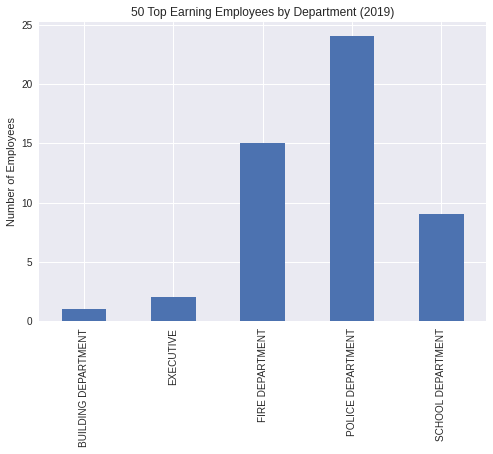

In [80]:
top_50_count.plot.bar()
plt.title('50 Top Earning Employees by Department (2019)')
plt.ylabel('Number of Employees')
plt.xlabel('')
plt.legend().remove()
plt.savefig(FP_FIG_TOP_OUT)

## Best earning police

In [69]:
cop = eer.groupby('dept').get_group('POLICE DEPARTMENT').sort_values('total',ascending=False).reset_index(drop=True)

In [70]:
cop.head()

,dept,name,title,regular,overtime,detail,other,total
0,POLICE DEPARTMENT,"BABCOCK, JOHN",POLICE SERGEANT,80671.10,5602.16,103695.0,6608.96,220322.30
1,POLICE DEPARTMENT,"TEMPESTA, DAVID",POLICE LIEUTENANT,94385.16,20752.21,65414.5,7346.52,210283.93
2,POLICE DEPARTMENT,"DALY, JOHN",DETAIL POLICE,69332.73,0.00,22375.0,76599.88,208376.84
3,POLICE DEPARTMENT,"MEAD, GEORGE",POLICE LIEUTENANT,94385.16,21276.57,69942.5,7050.60,203397.37
4,POLICE DEPARTMENT,"CLAFLIN, JOHN",POLICE SERGEANT,80671.10,16564.36,74257.5,8176.45,201714.49


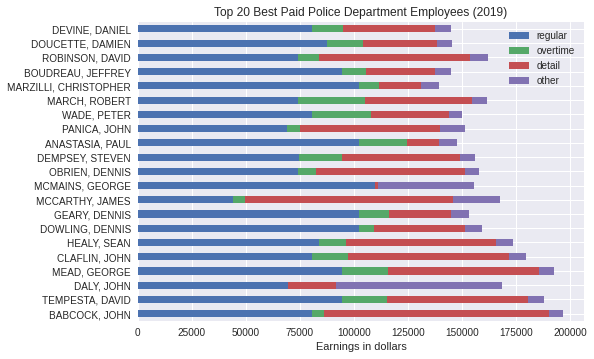

In [77]:
cop.loc[:20,:].plot.barh(x = 'name',y=['regular','overtime','detail','other'],stacked=True)
plt.xlabel('Earnings in dollars')
plt.ylabel('')
plt.title('Top 20 Best Paid Police Department Employees (2019)')
plt.savefig(FP_FIG_OVRTM_OUT)